In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [40]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [41]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [42]:
import re
import string

In [43]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [44]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [45]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [46]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [47]:
import nltk

In [48]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [50]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [51]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [52]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [53]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [54]:
from collections import Counter
vocab = Counter()

In [55]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [56]:
tokens = [key for key in vocab if vocab[key] > 10]

In [57]:
len(vocab)

15949

In [58]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [59]:
X = data['tweet']
y = data['label']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
X_train

1721    iphon pictur perfect smile core appl io iphon ...
6718    samsung iphon miss samsung iphon new phone whi...
1467    happi new year everybodi idavid soni xperia ne...
397             new tv bedroom happi samsung smart tv new
448     new phone setup last could also explain absenc...
                              ...                        
2067    clank rhyme manx wank rank tank bank yank use ...
225     send calendar event invit exchang user user ca...
5044    precis room scan huge win occipit arkit app ip...
1816    gain follow rt must follow follow back follow ...
666     expand appli collect slowli final got appli tv...
Name: tweet, Length: 6336, dtype: object

In [63]:
X_test

5429    mp cutter rington free android app beauti cute...
6549    blue green iphoneonli iphon photooftheday beau...
3122    rest case samsungmobil ye agre total holiday m...
6397     wow actual read fuck term condit hate appl dafuq
2041    thank god comput cover comput would goner stup...
                              ...                        
1897    lost everyth phone wont restor either day fuck...
5643    appl bid outflank android tech giant unveil ne...
1893    well happen itun ate entir music librari newes...
4380    edit coupl seri samsung coupl mega black white...
5136    samsung galaxi note fe fan edit n note blue gb...
Name: tweet, Length: 1584, dtype: object

In [64]:
y_train

1721    0
6718    0
1467    0
397     0
448     0
       ..
2067    0
225     1
5044    0
1816    0
666     0
Name: label, Length: 6336, dtype: int64

In [65]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [66]:
vectorized_x_train = vectorizer(X_train, tokens)

In [67]:
vectorized_x_test = vectorizer(X_test, tokens)

In [68]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
y_train

1721    0
6718    0
1467    0
397     0
448     0
       ..
2067    0
225     1
5044    0
1816    0
666     0
Name: label, Length: 6336, dtype: int64

In [70]:
vectorized_x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
y_test

5429    0
6549    0
3122    0
6397    1
2041    1
       ..
1897    1
5643    1
1893    1
4380    0
5136    0
Name: label, Length: 1584, dtype: int64

In [72]:
y_train.value_counts()

label
0    4709
1    1627
Name: count, dtype: int64

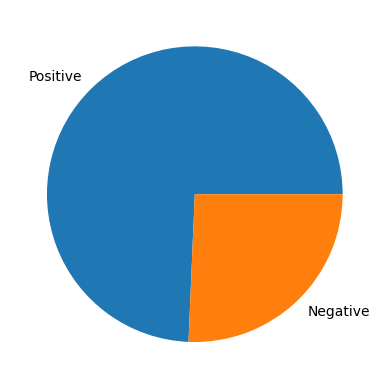

In [73]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9418, 1145) (9418,)


In [75]:
y_train_smote.value_counts()

label
0    4709
1    4709
Name: count, dtype: int64

In [76]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.8641618, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [79]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.916
	Recall = 0.966
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.879
	Precision = 0.728
	Recall = 0.832
	F1-Score = 0.777


In [80]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.869
	Recall = 0.954
	F1-Score = 0.909
Testing Scores:
	Accuracy = 0.863
	Precision = 0.673
	Recall = 0.887
	F1-Score = 0.765


In [81]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.83
	Precision = 0.675
	Recall = 0.624
	F1-Score = 0.648


In [82]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.873
	Precision = 0.755
	Recall = 0.734
	F1-Score = 0.745


In [83]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.883
	Precision = 0.75
	Recall = 0.805
	F1-Score = 0.776


In [84]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)